In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LinearRegression

In [3]:
df=pd.read_csv('DataSets/cars.csv')
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [4]:
sumofnull = df.isnull().sum()
sumofnull

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [5]:
dtype = df.dtypes
dtype

name          object
company       object
year          object
Price         object
kms_driven    object
fuel_type     object
dtype: object

In [6]:
car =df
car['name'] = car['name'].str.split(' ').str.slice(0, 3).str.join(' ')

car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium,Ford,2014,"5,75,000","36,000 kms",Diesel


In [7]:
numeric_years = car['year'].str.isnumeric()
car = car[numeric_years]
car['year'] = car['year'].astype(int)

C:\Users\Umair Yasir\AppData\Local\Temp\ipykernel_6512\3486285316.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['year'] = car['year'].astype(int)


In [8]:
filter=car[car['Price'] !='Ask For Price']
filter['Price']=filter['Price'].str.replace(',', '')
car=filter.copy()


C:\Users\Umair Yasir\AppData\Local\Temp\ipykernel_6512\2391538649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter['Price']=filter['Price'].str.replace(',', '')


In [9]:
car['Price']=car["Price"].astype(int)
car.dtypes

name          object
company       object
year           int32
Price          int32
kms_driven    object
fuel_type     object
dtype: object

In [10]:
car['kms_driven']=car['kms_driven'].str.split(" ").str.get(0)
car['kms_driven']=car['kms_driven'].str.replace(',','')
car=car[car['kms_driven']!= 'Petrol']
car['kms_driven']=car['kms_driven'].astype(int)

In [11]:
car.dtypes

name          object
company       object
year           int32
Price          int32
kms_driven     int32
fuel_type     object
dtype: object

In [12]:
car.dropna(inplace=True)
car.isnull().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

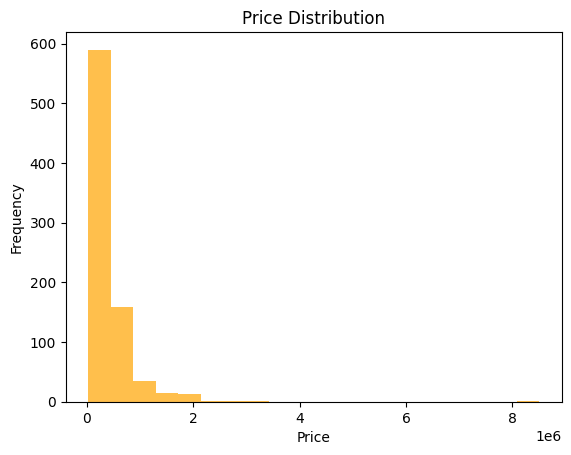

In [13]:
price_col=car['Price']
plt.hist(price_col,bins=20,color='orange',alpha=0.7)
plt.xlabel('Price')
plt.ylabel("Frequency")
plt.title("Price Distribution")
plt.show()

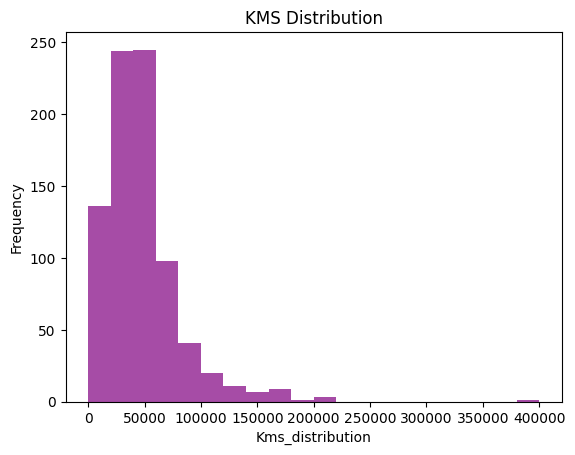

In [14]:
kms_driven_col = car['kms_driven']
plt.hist(kms_driven_col,bins=20,color='purple',alpha=0.7)
plt.xlabel('Kms_distribution')
plt.ylabel("Frequency")
plt.title("KMS Distribution")
plt.show()

<Axes: xlabel='fuel_type', ylabel='count'>

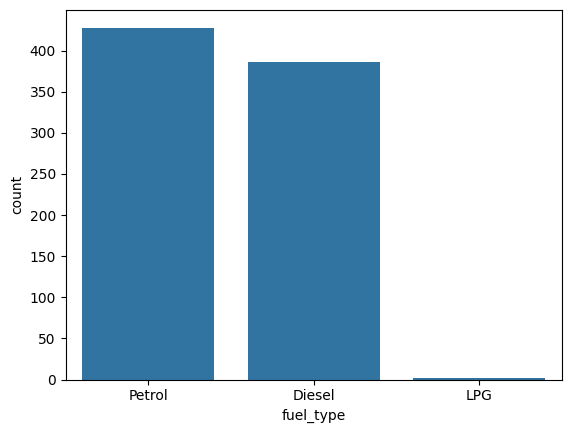

In [15]:
fuel_ax =car['fuel_type']
sns.countplot(x=fuel_ax)

<Axes: xlabel='company', ylabel='count'>

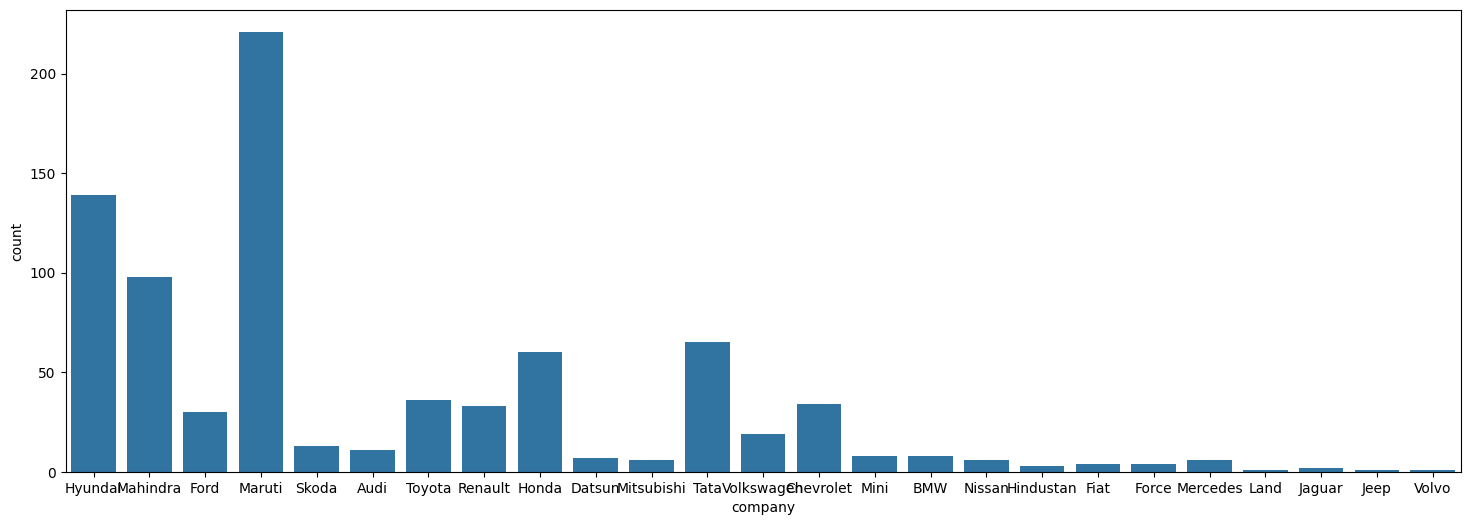

In [16]:
comp_ax = car['company']
plt.figure(figsize=(18,6))
sns.countplot(x=comp_ax)

C:\Users\Umair Yasir\AppData\Local\Temp\ipykernel_6512\74029501.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot (data=car,x='fuel_type', y='Price', kind='box', palette='viridis', height=6, aspect=1.5)


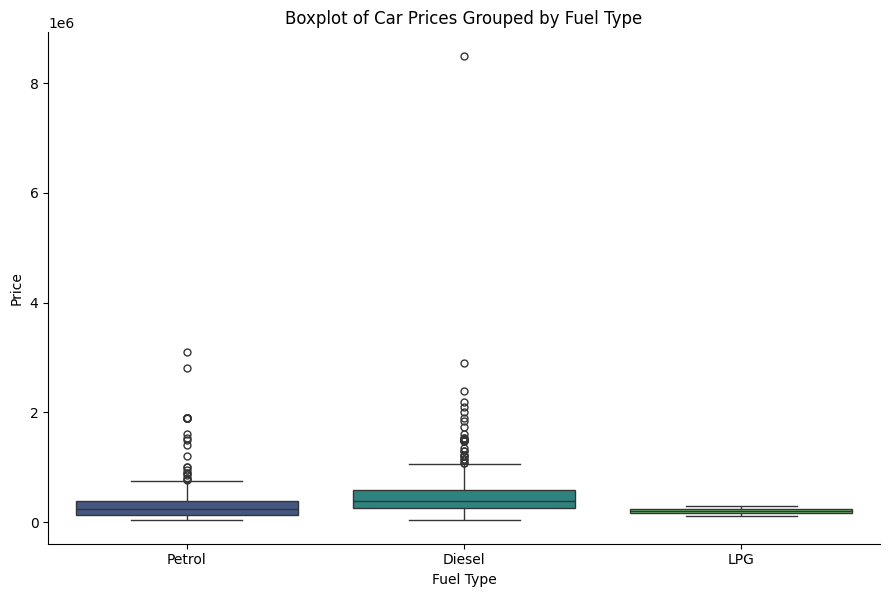

In [17]:
sns.catplot (data=car,x='fuel_type', y='Price', kind='box', palette='viridis', height=6, aspect=1.5)
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.title('Boxplot of Car Prices Grouped by Fuel Type')
plt.show()

C:\Users\Umair Yasir\AppData\Local\Temp\ipykernel_6512\2345949865.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot (data=car,x='company', y='Price', kind='box', palette='viridis', height=6, aspect=1.5)


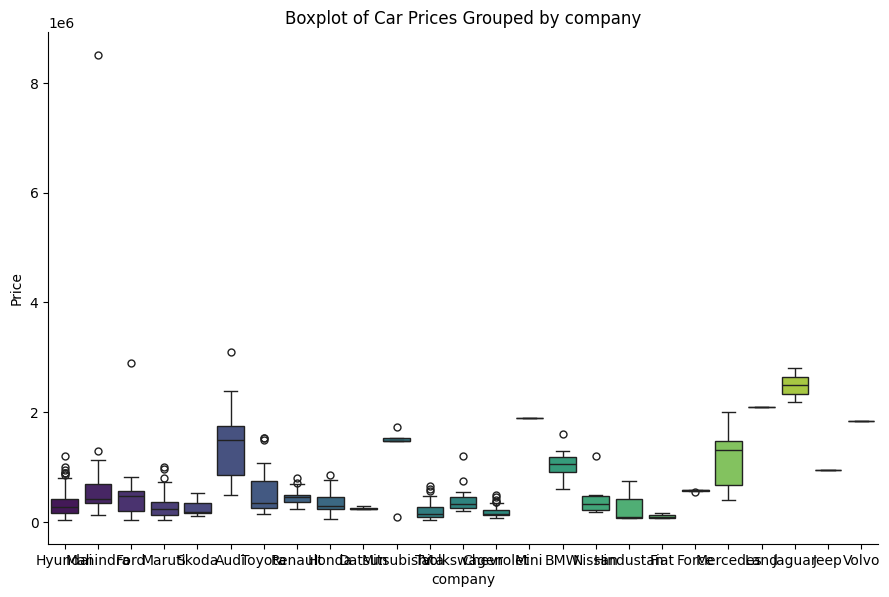

In [18]:
sns.catplot (data=car,x='company', y='Price', kind='box', palette='viridis', height=6, aspect=1.5)
plt.xlabel('company')
plt.ylabel('Price')
plt.title('Boxplot of Car Prices Grouped by company')
plt.show()

C:\Users\Umair Yasir\AppData\Local\Temp\ipykernel_6512\983540762.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot (data=car,x='year', y='Price', kind='box', palette='viridis', height=6, aspect=1.5)


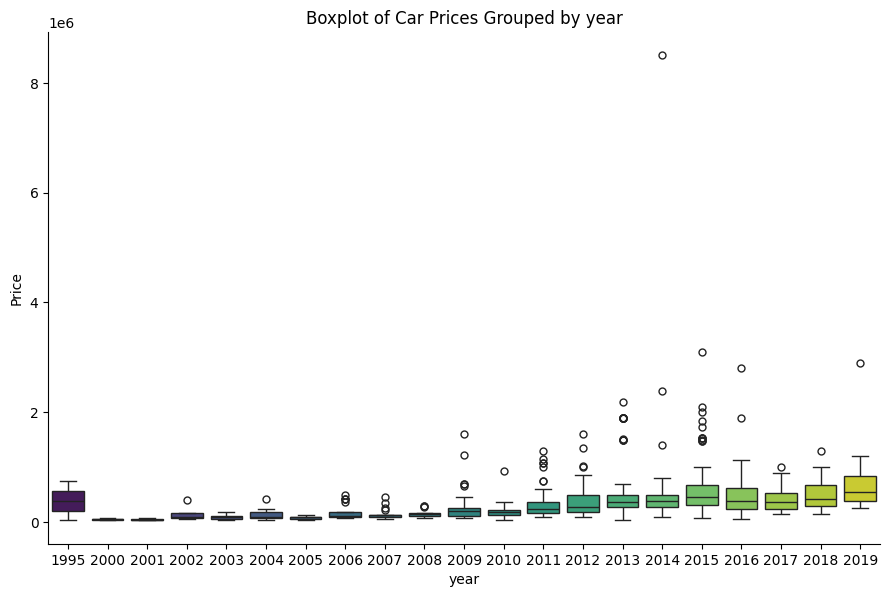

In [19]:
sns.catplot (data=car,x='year', y='Price', kind='box', palette='viridis', height=6, aspect=1.5)
plt.xlabel('year')
plt.ylabel('Price')
plt.title('Boxplot of Car Prices Grouped by year')
plt.show()

In [20]:
x =car.drop('Price',axis='columns')
y =car['Price']

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=4)

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
ohe = OneHotEncoder()
ohe.fit(car[['name', 'company', 'fuel_type']])
column_trans = make_column_transformer(
    (OneHotEncoder(categories=ohe.categories_), ['name', 'company', 'fuel_type']),
    remainder='passthrough')

In [24]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
lr=LinearRegression()
pipe = make_pipeline(column_trans, lr)
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
lr_score = r2_score(y_test, y_pred)

In [26]:
from sklearn.linear_model import Lasso
lass=Lasso(alpha=1,max_iter=10000,tol=0.001)
pipe = make_pipeline(column_trans, lr)
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
lasso_score  = r2_score(y_test, y_pred)

In [27]:
lasso_score

0.7191507339099219

In [28]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=10)
pipe = make_pipeline(column_trans, rfr)
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
rf_score  = r2_score(y_test,y_pred)

In [29]:
rf_score

0.8643996386717673

In [30]:
import pandas as pd
data = pd.DataFrame([['Maruti Suzuki Swift', 'Maruti', 2019, 100, 'Petrol']],
                              columns=['name', 'company', 'year', 'kms_driven', 'fuel_type'])
prediction =pipe.predict(data)
prediction


array([493500.])